In [ ]:
import os
from IPython.display import Image
Image(filename="../input/afaggasgas/Depositphotos_42367147_m-2015-810x540.jpg", width= 2000, height=1000)




# <span style='font-family:"Times New Roman"'> <span styel=''> CREDIT CARD FRAUD DETECTION
    
# <span style='font-family:"Times New Roman"'> <span styel=''>  DATA

 <span style='font-family:"Times New Roman"'> <span styel=''> The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

  <span style='font-family:"Times New Roman"'> <span styel=''> It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# <span style='font-family:"Times New Roman"'> <span styel=''> INTRODUCTION
 <span style='font-family:"Times New Roman"'> <span styel=''> Credit card fraud happens when consumers give their credit card number to unfamiliar individuals, when cards are lost or stolen, when mail is diverted from the intended recipient and taken by criminals, or when employees of a business copy the cards or card numbers of a cardholder


<span style='font-family:"Times New Roman"'> <span styel=''> In recent years credit card usage is predominant in modern day society and credit card fraud is keep on growing. Financial losses due to fraud affect not only merchants and banks (e.g. reimbursements), but also individual clients. If the bank loses money, customers eventually pay as well through higher interest rates, higher membership fees, etc. Fraud may also affect the reputation and image of a merchant causing non-financial losses that, though difficult to quantify in the short term, may become visible in the long period.

 <span style='font-family:"Times New Roman"'> <span styel=''> A Fraud Detection System (FDS) should not only detect fraud cases efficiently, but also be cost-effective in the sense that the cost invested in transaction screening should not be higher than the loss due to frauds . 
The predictive model scores each transaction with high or low risk of fraud and those with high risk generate alerts. Investigators check these alerts and provide a feedback for each alert, i.e. true positive (fraud) or false positive (genuine). 

 <span style='font-family:"Times New Roman"'> <span styel=''> Most banks considers huge transactions, among which very few is fraudulent, often less than 0.1% . Also, only a limited number of transactions can be checked by fraud investigators, i.e. we cannot ask a human person to check all transactions one by one if it is fraudulent or not.

 <span style='font-family:"Times New Roman"'> <span styel=''> Alternatively, with Machine Learning (ML) techniques  we can efficiently discover fraudulent patterns and predict transactions that are probably to be fraudulent. ML techniques consist in inferring a prediction model on the basis of a set of examples. The model is in most cases a parametric function, which allows predicting the likelihood of a transaction to be fraud, given a set of features describing the transaction.
    
# <span style='font-family:"Times New Roman"'> <span styel=''> Methodology
     
<span style='font-family:"Times New Roman"'> <span styel=''> Fraud detection is a binary classification task in which any transaction will be predicted and labeled as a fraud or legit. In this Notebook state of the art classification techniques were tried for this task and their performances were compared. 

- Logistic Regression
- Linear Discriminant Analysis
- KNeighbors Classifier
- RandomForest Classifier
- Decision Tree Classifier
- XGB Classifier
- GaussianNB
- Gradient Boosting Classifier
- LGBM Classifier

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
!pip install researchpy
import researchpy as rp
from datetime import datetime, timedelta
from collections import Counter
from numpy import where

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.gridspec as gridspec


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,auc,roc_curve
from sklearn.metrics import average_precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# <span style='font-family:"Times New Roman"'> <span styel=''> EDA (Exploratory Data Analysis)

In [ ]:
data= pd.read_csv("../input/creditcardfraud/creditcard.csv")
data.head()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

 <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> There are not any null variable. The data set contains 284,807 transactions. The mean value of all transactions is 88.35 USD while the largest transaction recorded in this data set amounts to 25,691 USD. However, as you might be guessing right now based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum. As ı told you, I cant say more than about anything about other variables because of the dataset is done PCA and some privacy policy problems.



In [ ]:
data.Amount = np.log(data.Amount + 0.001)#İt will will make it understandable to Amount variable
data["ClassNew"]=data["Class"].apply(lambda x: "FRAUD" if x == 1 else "NOT FRAUD")
data["ClassNew"].value_counts()

In [ ]:
print("NOT FRAUD %",
      (data["ClassNew"].value_counts()[0]/data["ClassNew"].value_counts().sum())*100)

print("FRAUD %",
      (data["ClassNew"].value_counts()[1]/data["ClassNew"].value_counts().sum())*100)
print(50*"-")
print("NOT FRAUD AMOUNT %",
      (data["Amount"][data["ClassNew"]=="NOT FRAUD"].sum()/data["Amount"].sum())*100)

print("FRAUD % AMOUNT",
      (data["Amount"][data["ClassNew"]=="FRAUD"].sum()/data["Amount"].sum())*100)

In [ ]:
data.head()

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>   As you can see, there are 284315 "Not Fraud" transaction and 492 "Fraud" transaction . Only %0.17 transaction  is "Fraud". "Not Fraud " transaction prediction might be very easy but "Not Frauds" transactions are very low according to "Not Fraud" transaction  so "Not Fraud" transaction  predicting is hard. We will implement some methods to solving this problem.

In [ ]:
plt.figure(figsize=(30,100))

unclas=data.iloc[:, 0:30]
sns.set(style="darkgrid")
grid = gridspec.GridSpec(14, 2)

for i, col in enumerate(unclas):
    plt.subplot(16,2, i+1)
    sns.distplot(data[col][data["ClassNew"]=="FRAUD"],
                 kde=True,
                 bins=50,
                 color="r")
    sns.distplot(data[col][data["ClassNew"]=="NOT FRAUD"],
                 kde=True,
                 bins=50,
                 color="b")
    plt.legend(labels=["FRAUD",
                       "NOT FRAUD"])
    plt.xlabel("")
    plt.ylabel("Density",
               fontsize=19)
    plt.title("Dispersion of {}".format(str(col)),
              fontsize=26)
    plt.tick_params(labelsize=22)

plt.tight_layout()

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> When we review the distributions of variables, we see that especially V3, V4, V5, V6, V11, V12, V13, V14, V16, V18, V19 variables there has been different transactions distributions between Fraud and Not Fraud. We can better understeand the this distributions with boxplot.

In [ ]:
plt.figure(figsize=(30,50))
unclass=data.iloc[:, [3,4,5,6,11,12,13,14,16,18]]
sns.set(style="darkgrid")


for i, col in enumerate(unclass):
    plt.subplot(5,2, i+1)
    sns.boxplot(x=data[col],
                y="ClassNew",
                data=data)
    plt.ylabel("Transaction Type",
               fontsize=22)
    plt.xlabel("")
    plt.tick_params(labelsize=22)
    plt.title("Dispersion of {}".format(str(col)),
              fontsize=26)
plt.tight_layout()

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Let's take close look the we determined variables. Firstly, we see there are many outlier variables in Not Fraud transactions according to Fraud transactions. This is interesting but there are only 492 Frauds transactions so it might be due to this.

In [ ]:
time_class = pd.to_timedelta(data['Time'],
                            unit='s')
data['Time_min'] = (time_class.dt.components.minutes).astype(int)
data['Time_hour'] = (time_class.dt.components.hours).astype(int)

In [ ]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.distplot(data[data['ClassNew'] == "NOT FRAUD"]["Time_hour"],
             color='r')
sns.distplot(data[data['ClassNew'] == "FRAUD"]["Time_hour"],
             color='b')
plt.title('Fraud x NOT FRAUD Transactions by Hours',
          fontsize=17)
plt.legend(labels=["FRAUD",
                   "NOT FRAUD"])
plt.xlim([-1,25])
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.distplot(data[data['ClassNew'] == "NOT FRAUD"]["Time_min"],
             color='r')
sns.distplot(data[data['ClassNew'] == "FRAUD"]["Time_min"],
             color='b')
plt.title('FRAUD x NOT FRAUD Transactions by Minutes',
          fontsize=17)
plt.legend(labels=["FRAUD",
                   "NOT FRAUD"])
plt.xlim([-1,61])
plt.show()


In [ ]:
plt.figure(figsize=(26,26))

corr= data.corr()

sns.heatmap(data=corr,
            annot=True,
            cbar=False,
            square=True,
            fmt=".2%")

plt.tight_layout()

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> I cant see strong correlation between the variables. it reason might be pre-made PCA analysis

# <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Feature Selection
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Outlier detection is a complex topic. The trade-off between reducing the number of transactions and thus volume of information available to my algorithms and having extreme outliers skew the results of your predictions is not easily solvable and highly depends on your data and goals. In my case, I decided to focus exclusively on ML methods and will not focus on this topic. 

## <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>  Create Function to Find Best Algorithm
    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

-<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>SMOTE
-<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Near Miss Algorithm

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> **SMOTE (Synthetic Minority Oversampling Technique) – Oversampling**

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>  **NearMiss Algorithm – Undersampling**

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process. To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.

In [ ]:
def split():
    X=data.drop(columns=["Class", "ClassNew"])
    y=data["Class"].values
    return X, y

In [ ]:
def SMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from numpy import where
    
    X, y = split()
    counter = Counter(y)
    print(counter)
    smt = SMOTE(random_state=0)
    X, y = smt.fit_resample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from numpy import where    
    
    X, y = split()
    counter = Counter(y)
    print(counter)
    bsmote= BorderlineSMOTE(random_state=0)
    X, y = bsmote.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test


def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from numpy import where    
    
    X, y = split()
    counter = Counter(y)
    print(counter)
    smotesvm= SVMSMOTE(random_state=0)
    X, y = smotesvm.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test


def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from numpy import where      
    
    X, y = split()
    counter = Counter(y)
    print(counter)
    adasyn= ADASYN(random_state=0)
    X, y = adasyn.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test


- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> SMOTE With Selective Synthetic Sample Generation

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Borderline-SMOTE A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model. We can then oversample just those difficult instances, providing more resolution only where it may be required.

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Borderline-SMOTE SVM

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Their approach is summarized in the 2009 paper titled “Borderline Over-sampling For Imbalanced Data Classification.” An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority class that close to the support vectors become the focus for generating synthetic examples.

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Adaptive Synthetic Sampling (ADASYN)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class. That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>I defined data X and y by creating Split() Function. Then I created and added functions for each SMOTE and ADASYN method. Thus, we will be able to easily apply all of them to the classification algorithms I have determined and learn which one works better.

In [ ]:
%time X_train1,X_test1, y_train1, y_test1 = SMOTE()
print(50*"-")
%time X_train2, X_test2, y_train2, y_test2 = BSMOTE()
print(50*"-")
%time X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
print(50*"-")
%time X_train4, X_test4, y_train4, y_test4 = ADASYN()

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>Here we see the sampling status and running times of our functions. Thus, we can facilitate decision making for each function.

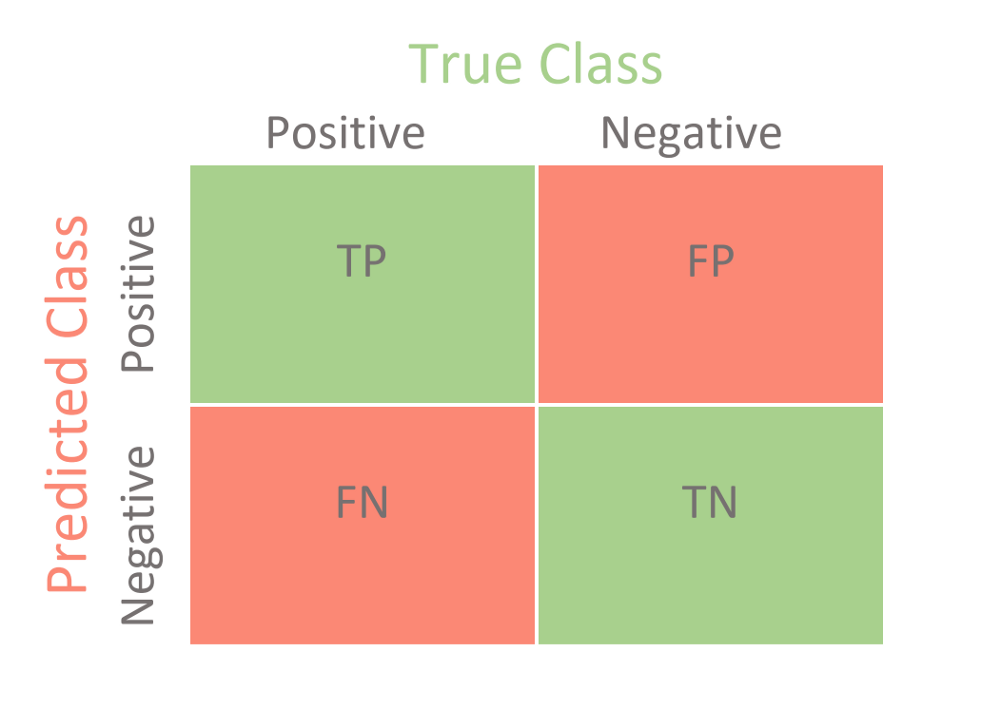

# <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Confusion Matrix

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> A confusion matrix is a technique for summarizing the performance of a classification algorithm.

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.


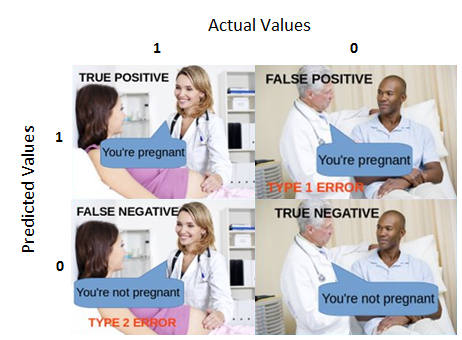


- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>  True Positives (TP): These are cases in which we predicted yes (they have the pregnant), and they do have the pregnant.

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>  True Negatives (TN): We predicted no, and they don't have the pregnant.

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>  False Positives (FP): We predicted yes, but they don't actually have the pregnant. (Also known as a "Type I error.")

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>   False Negatives (FN): We predicted no, but they actually do have the pregnant. (Also known as a "Type II error.")


In [ ]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    X, y = split()
    train_matrix = pd.crosstab(y_train,
                               model.predict(X_train),
                               rownames=['Actual'],
                               colnames=['Predicted']) 
    
    test_matrix = pd.crosstab(y_test,
                              model.predict(X_test),
                              rownames=['Actual'],
                              colnames=['Predicted'])
    
    matrix = pd.crosstab(y,
                         model.predict(X),
                         rownames=['Actual'],
                         colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,
                                   sharey=True,
                                   figsize=(25, 10))
    
    m1 = sns.heatmap(train_matrix,
                     annot=True,
                     fmt=".1f",
                     cbar=False,
                     annot_kws={"size": 16},ax=ax1)
    
    m1.set_title(title, fontsize=25)
    m1.set_ylabel('Total Fraud = {}'.format(y_train.sum()),
                  fontsize=19,
                  rotation=90)
    m1.set_xlabel('Accuracy score for Training Set: %{}'.format(accuracy_score(model.predict(X_train),
                                                                             y_train)*100),
                 fontsize=19)
    
    m2 = sns.heatmap(test_matrix,
                     annot=True,
                     fmt=".1f",
                     cbar=False,
                     annot_kws={"size": 16},ax=ax2)
    m2.set_ylabel('Total Fraud = {}'.format(y_test.sum()),
                  fontsize=19,
                  rotation=90)
    m2.set_xlabel('Accuracy score for Testing Set: %{}'.format(accuracy_score(model.predict(X_test),
                                                                            y_test)*100),
                  fontsize=19)
    
    m3 = sns.heatmap(matrix,
                     annot=True,
                     fmt=".1f",
                     cbar=False,
                     annot_kws={"size": 16},ax=ax3)
    m3.set_ylabel('Total Fraud = {}'.format(y.sum()),
                  fontsize=19,
                  rotation=90)
    m3.set_xlabel('Accuracy score for Total Set: %{}'.format(accuracy_score(model.predict(X),
                                                                           y)*100),
                 fontsize=19)
    

    plt.show()
    return y, model.predict(X)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Here I created function to calculate and visualize confusion matrix.Also, ı wanted to add the distinguishing feature selection though.

# <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Find Best Algorithm

In [ ]:
title = 'Logistic Regression/SMOTE'
%time  Models(LogisticRegression(solver='liblinear'),X_train1, X_test1, y_train1, y_test1, title)

title = 'Logistic Regression/BSMOTE'
%time Models(LogisticRegression(solver='liblinear'),X_train2, X_test2, y_train2, y_test2, title)

title = 'Logistic Regression/SMOTESVM'
%time y,ypred5= Models(LogisticRegression(solver='liblinear'),X_train3, X_test3, y_train3, y_test3, title)

title = 'Logistic Regression/ADASYN'
%time Models(LogisticRegression(solver='liblinear'),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>No, it's not good.

In [ ]:
title = 'Gaussian NB/SMOTE'
%time Models(GaussianNB(),X_train1, X_test1, y_train1, y_test1, title)

title = 'Gaussian NB/BSMOTE'
%time Models(GaussianNB(),X_train2, X_test2, y_train2, y_test2, title)

title = 'Gaussian NB/SMOTESVM'
%time y, ypred6= Models(GaussianNB(),X_train3, X_test3, y_train3, y_test3, title)

title = 'Gaussian NB/ADASYN'
%time Models(GaussianNB(),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> No

In [ ]:
title = 'DecisionTree Classifier/SMOTE'
%time Models(DecisionTreeClassifier(max_depth=14),X_train1, X_test1, y_train1, y_test1, title)

title = 'DecisionTree Classifier/BSMOTE'
%time y,ypred7= Models(DecisionTreeClassifier(max_depth=14),X_train2, X_test2, y_train2, y_test2, title)

title = 'DecisionTree Classifier/SMOTESVM'
%time Models(DecisionTreeClassifier(max_depth=14),X_train3, X_test3, y_train3, y_test3, title)

title = 'DecisionTree Classifier/ADASYN'
%time Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Definitely no

In [ ]:
title = 'Random Forest Classifier/SMOTE'
%time Models(RandomForestClassifier(random_state=0),X_train1, X_test1, y_train1, y_test1, title)

title = 'Random Forest Classifier/BSMOTE'
%time Models(RandomForestClassifier(random_state=0),X_train2, X_test2, y_train2, y_test2, title)

title = 'Random Forest Classifier/SMOTESVM'
%time Models(RandomForestClassifier(random_state=0),X_train3, X_test3, y_train3, y_test3, title)

title = 'Random Forest Classifier/ADASYN'
%time Models(RandomForestClassifier(random_state=0),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> I think we found. 'Random Forest Classifier/SMOTE' and  'Random Forest Classifier/ADASYN' might be.

In [ ]:
title = 'GradientBoosting Classifier/SMOTE'
%time Models(GradientBoostingClassifier(n_estimators=500,learning_rate=1,max_features=2,max_depth=2,random_state=0),X_train1, X_test1, y_train1, y_test1, title)

title = 'GradientBoosting Classifier/BSMOTE'
%time Models(GradientBoostingClassifier(n_estimators=500,learning_rate=1,max_features=2,max_depth=2,random_state=0),X_train2, X_test2, y_train2, y_test2, title)

title = 'GradientBoosting Classifier/SMOTESVM'
%time Models(GradientBoostingClassifier(n_estimators=500,learning_rate=1,max_features=2,max_depth=2,random_state=0),X_train3, X_test3, y_train3, y_test3, title)

title = 'GradientBoosting Classifier/ADASYN'
%time y, ypred8= Models(GradientBoostingClassifier(n_estimators=500,learning_rate=1,max_features=2,max_depth=2,random_state=0),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Oh, no

In [ ]:
title = 'XGB Classifier/SMOTE'
%time Models(XGBClassifier(),X_train1, X_test1, y_train1, y_test1, title)

title = 'XGB Classifier/BSMOTE'
%time Models(XGBClassifier(),X_train2, X_test2, y_train2, y_test2, title)

title = 'XGB Classifier/SMOTESVM'
%time Models(XGBClassifier(),X_train3, X_test3, y_train3, y_test3, title)

title = 'XGB Classifier/ADASYN'
%time Models(XGBClassifier(),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> 'XGB Classifier/ADASYN' and 'XGB Classifier/SMOTE' can be okey.

In [ ]:
title = 'LGBM Classifier/SMOTE'
%time y,ypred9= Models(LGBMClassifier(),X_train1, X_test1, y_train1, y_test1, title)

title = 'LGBM Classifier/BSMOTE'
%time Models(LGBMClassifier(),X_train2, X_test2, y_train2, y_test2, title)

title = 'LGBM Classifier/SMOTESVM'
%time Models(LGBMClassifier(),X_train3, X_test3, y_train3, y_test3, title)

title = 'LGBM Classifier/ADASYN'
%time Models(LGBMClassifier(),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> I think, no

In [ ]:
title = 'Linear Discriminant Analysis/SMOTE'
%time Models(LinearDiscriminantAnalysis(),X_train1, X_test1, y_train1, y_test1, title)

title = 'Linear Discriminant Analysis/BSMOTE'
%time Models(LinearDiscriminantAnalysis(),X_train2, X_test2, y_train2, y_test2, title)

title = 'Linear Discriminant Analysis/SMOTESVM'
%time y,ypred10= Models(LinearDiscriminantAnalysis(),X_train3, X_test3, y_train3, y_test3, title)

title = 'Linear Discriminant Analysis/ADASYN'
%time Models(LinearDiscriminantAnalysis(),X_train4, X_test4, y_train4, y_test4, title)

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> No.

In [ ]:
def Models1(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)

    X, y = split()
    train_matrix = pd.crosstab(y_train,
                               model.predict(X_train),
                               rownames=['Actual'],
                               colnames=['Predicted']) 
    
    test_matrix = pd.crosstab(y_test,
                              model.predict(X_test),
                              rownames=['Actual'],
                              colnames=['Predicted'])
    
    matrix = pd.crosstab(y,
                         model.predict(X),
                         rownames=['Actual'],
                         colnames=['Predicted'])
     
    ypred= model.predict(X)  
    fpr, tpr, thresholds = roc_curve(y, ypred)
    roc_auc = auc(fpr, tpr)
    precision, recall, thresholds= precision_recall_curve(y, ypred)
    auc_score = auc(recall, precision)
    df = pd.DataFrame(classification_report(y, ypred, digits=2,output_dict=True)).T
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Classification Report"}, inplace=True)

    
    fig1=ff.create_annotated_heatmap(z= train_matrix.values,
                                     colorscale = 'OrRd',
                                     hoverinfo='z')
    
    fig2=ff.create_annotated_heatmap(test_matrix.values,
                                     colorscale = 'OrRd',
                                     hoverinfo='z')
    
    fig3=ff.create_annotated_heatmap(matrix.values,
                                     colorscale = 'OrRd',
                                     hoverinfo='z')
    
    fig4= go.Figure(data=[go.Scatter(x=fpr,
                                     y=tpr,
                    mode='lines+markers',
                                     line=dict(color='black'),
                                     showlegend=False)])
    
    fig5= go.Figure(data=[go.Scatter(x=[0,1], y=[0,1],
                    mode='lines+markers',
                                     line = dict(dash='dash',
                                                 color='red'),
                                     showlegend=False)])
    
    fig6= go.Figure(data=[go.Scatter(x=recall,
                                     y=precision,
                    mode='lines+markers', line=dict(color='black'),
                                     showlegend=False)])
    
    fig7= go.Figure(data=[go.Scatter(x=[0,1],
                                     y=[1,0],
                    mode='lines+markers', line = dict(dash='dash',
                                                      color='red'),
                                     showlegend=False)])
    
    fig8= go.Figure(data=[go.Scatter( x=thresholds,
                                     y=precision[1:],
                    mode='lines+markers',
                                     line = dict( color='red'),
                                     name="Precision")])
    
    fig9= go.Figure(data=[go.Scatter( x=thresholds,
                                     y= recall[1:],
                    mode='lines+markers',
                                     line = dict(color='black'),
                                     name="Recall")])
    
    
    fig10 = go.Figure(data=[go.Table(header=dict(values=list(df.columns),
                                                font=dict(color='black',
                                                          size=14),
                                                 fill_color='paleturquoise',
                                                 align='left'),
                                    cells=dict(values=[df["Classification Report"], df.precision, df.recall, df["f1-score"], df.support],
                                               fill_color='lavender',
                                               align='left'))])


    
    
    fig = make_subplots(rows=3,cols=3,
                        specs=[[{},{},{}],
                               [{"colspan":1}, {}, {}],
                              [{"type": "table", "colspan":3}, {}, {}]],
                        subplot_titles=('Train Matrix <br> %{}'.format(accuracy_score(model.predict(X_train),
                                                                                      y_train)*100),
                                        'Test Matrix <br> %{}'.format(accuracy_score(model.predict(X_test),
                                                                                     y_test)*100),
                                        "Matrix <br> %{}".format(accuracy_score(model.predict(X),y)*100),
                                        f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
                                        'Precision-Recall Curve',
                                        "Precision and Recall for Diffrent Threshold Values",
                                        "Classification Report"))

    fig.add_trace(fig1.data[0], 1, 1)
    fig.add_trace(fig2.data[0], 1, 2)
    fig.add_trace(fig3.data[0], 1, 3)
    fig.add_trace(fig4.data[0], 2, 1)
    fig.add_trace(fig5.data[0], 2, 1)
    fig.add_trace(fig6.data[0], 2, 2)
    fig.add_trace(fig7.data[0], 2, 2)
    fig.add_trace(fig8.data[0], 2, 3)
    fig.add_trace(fig9.data[0], 2, 3)
    fig.add_trace(fig10.data[0], 3, 1)
    
    annot1 = list(fig1.layout.annotations)
    annot2 = list(fig2.layout.annotations)
    annot3 = list(fig3.layout.annotations)
    
    

    for k in range(len(annot1)):
        annot1[k]['xref'] = 'x'
        annot1[k]['yref'] = 'y'

        
    for k in range(len(annot2)):
        annot2[k]['xref'] = 'x2'
        annot2[k]['yref'] = 'y2'

    
    for k in range(len(annot3)):
        annot3[k]['xref'] = 'x3'
        annot3[k]['yref'] = 'y3'
    
    new_annotations = annot1+annot2+annot3
    
    for anno in new_annotations:
        fig.add_annotation(anno)
        

    fig['layout']['yaxis1'].update(title_text='ACTUAL')
    fig['layout']['xaxis1'].update(title_text="PREDICTED")
    fig['layout']['yaxis2'].update(title_text='ACTUAL')
    fig['layout']['xaxis2'].update(title_text="PREDICTED") 
    fig['layout']['yaxis3'].update(title_text='ACTUAL')
    fig['layout']['xaxis3'].update(title_text="PREDICTED")
    fig['layout']['xaxis4'].update(title_text="False Positive Rate") 
    fig['layout']['yaxis4'].update(title_text="True Positive Rate") 
    fig['layout']['xaxis5'].update(title_text="Recall") 
    fig['layout']['yaxis5'].update(title_text="Precision")
    fig['layout']['yaxis6'].update(title_text="Precision / Recall")
    fig['layout']['xaxis6'].update(title_text="Threshold")

    
    fig.add_annotation(dict(x=0.495,
                            y=0.005,
                            xref="paper",
                                yref="paper", 
                                text='NOT FRAUD= 0 / FRAUD= 1',
                                font_size = 20,
                                showarrow=False))
            

    
    fig.update_layout(height=1100,
                      width=1500,
                      font_family = 'TimesNewRoman',
                      font_color= "black",
                      font_size = 15,
                      title=title,
                      title_x = 0.5,
                      legend=dict(
                          x=0.93,
                          y=0.5,
                          traceorder='normal',
                          font=dict(size=12)))

    fig.show()
    return y, model.predict(X)


<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Looking at the models, I chose 4 algorithms;

- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Random Forest Classifier/SMOTE
- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Random Forest Classifier/ADASYN
- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> XGB Classifier/SMOTE
- <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> XGB Classifier/ADASYN

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> After, I'm building a new function looking at the ROC, Precision Recall Curve and ,  Diffrent Threshold Values, Classification Report tables and making them more beautiful with visualization. 
  
 <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>  ROC Curve & Precision Recall Curve

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Classification Report

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model. To understand the classification report of a machine learning model, you need to know all of the metrics displayed in the report. For a clear understanding, I have explained all of the metrics below so that you can easily understand the classification report of your machine learning model.
    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> **Precision:** Precision is defined as the ratio of true positives to the sum of true and false positives.
    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> **Recall:**	Recall is defined as the ratio of true positives to the sum of true positives and false negatives. 
    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> **F1 Score:** The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is. 
    
<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> **Support:**	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process. 

In [ ]:
title = 'Random Forest Classifier/SMOTE'
y, ypred1=Models1(RandomForestClassifier(random_state=0),X_train1, X_test1, y_train1, y_test1, title)

title = 'Random Forest Classifier/ADASYN'
y, ypred2=Models1(RandomForestClassifier(random_state=0),X_train4, X_test4, y_train4, y_test4, title)

title = 'XGB Classifier/SMOTE'
y, ypred3=Models1(XGBClassifier(random_state=0),X_train1, X_test1, y_train1, y_test1, title)

title = 'XGB Classifier/ADASYN'
y, ypred4=Models1(XGBClassifier(random_state=0),X_train4, X_test4, y_train4, y_test4, title)

In [ ]:


fpr1, tpr1, thresh1 = roc_curve(y, ypred1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y, ypred2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y, ypred3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y, ypred4, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y, ypred5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y, ypred6, pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y, ypred7, pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y, ypred8, pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y, ypred9, pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y, ypred10, pos_label=1)

random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y, ypred1)
auc_score2 = roc_auc_score(y, ypred2)
auc_score3 = roc_auc_score(y, ypred3)
auc_score4 = roc_auc_score(y, ypred4)
auc_score5 = roc_auc_score(y, ypred5)
auc_score6 = roc_auc_score(y, ypred6)
auc_score7 = roc_auc_score(y, ypred7)
auc_score8 = roc_auc_score(y, ypred8)
auc_score9 = roc_auc_score(y, ypred9)
auc_score10 = roc_auc_score(y, ypred10)

trace1=go.Scatter( x=fpr1,
                  y= tpr1,
                  mode='lines+markers',
                  line = dict(color='orange'),
                  name=f"Random Forest Classifier/SMOTE (AUC={auc(fpr1, tpr1):.4f})")  

trace2=go.Scatter( x=fpr2,
                  y= tpr2,
                  mode='lines+markers', 
                  line = dict(color='green'),
                  name=f"Random Forest Classifier/ADASYN(AUC={auc(fpr2, tpr2):.4f})")

trace3=go.Scatter( x=fpr3,
                  y= tpr3,
                  mode='lines+markers',
                  line = dict(color='red'),
                  name=f"XGB Classifier/SMOTE(AUC={auc(fpr3, tpr3):.4f})")

trace4=go.Scatter( x=fpr4,
                  y= tpr4,
                  mode='lines+markers',
                  line = dict(color='yellow'),
                  name=f"XGB Classifier/ADASYN(AUC={auc(fpr4, tpr4):.4f})")


trace5=go.Scatter( x=p_fpr,
                  y= p_tpr,
                  mode='lines+markers',
                  line = dict(dash='dash',
                              color='black'),
                  showlegend=False)

trace6=go.Scatter( x=fpr5,
                  y= tpr5,
                  mode='lines+markers',
                  line = dict( color='purple'),
                  name=f"Logistic Regression/SMOTESVM(AUC={auc(fpr5, tpr5):.4f})")

trace7=go.Scatter( x=fpr6,
                  y= tpr6,
                  mode='lines+markers',
                  line = dict( color='blue'),
                  name=f"Gaussian NB/SMOTESVM(AUC={auc(fpr6, tpr6):.4f})")

trace8=go.Scatter( x=fpr7,
                  y= tpr7,
                  mode='lines+markers',
                  line = dict( color='pink'),
                  name=f"DecisionTree Classifier/BSMOTE(AUC={auc(fpr7, tpr7):.4f})")

trace9=go.Scatter( x=fpr8,
                  y= tpr8,
                  mode='lines+markers',
                  line = dict( color='turquoise '),
                  name=f"GradientBoosting Classifier/ADASYN(AUC={auc(fpr8, tpr8):.4f})")

trace10=go.Scatter( x=fpr9,
                   y= tpr9,
                   mode='lines+markers',
                   line = dict( color='grey '),
                   name=f"LGBM Classifier/SMOTE(AUC={auc(fpr9, tpr9):.4f})")

trace11=go.Scatter( x=fpr10,
                   y= tpr10,
                   mode='lines+markers',
                   line = dict( color='black'),
                   name=f"Linear Discriminant Analysis/SMOTESVM(AUC={auc(fpr10, tpr10):.4f})")

fig = make_subplots(rows=1,
                    cols=1, 
                    specs=[[{'type': 'scatter'}]])

fig.add_traces([trace1,trace2,
                trace3,trace4,
                trace5,trace6,
                trace7,trace8,
                trace9,trace10,
                trace11],
               rows=1,
               cols=1)

fig.update_layout(height=600,
                  width=850,
                  title_text="ROC CURVE",
                  font_family = 'TimesNewRoman',
                  font_size = 15,
                  font_color= "black",
                  title_x = 0.5)

fig.show()

# <span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''> Conclusion

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>I think Random Forest Classifier/ADASYN method is better. When we look the charts, ı see the results are beter on the Random Forest Classifier/ADASYN charts. But don't forget,  did not use Future Selection methods and when I got data , the data was  PCA format so see the outiler data or noisy data is very hard. I would not wanted to incorrect predict. The data already was İnbalanced.

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>There are 35 False Positive in Forest Classifier/ADASYN method. This means, per 284772 transactions will have 35 wrong predict.  When you looking  first it can be looks good. But there are doing millions transactions by customers every day in the bank. This means, the banks might lock up hundered of  customers account unnecessary and this would reduce bank confidence.  

<span styel=''> <span style='font-family:"Times New Roman"'> <span styel=''>This method can be developed with different methods and implement feature selection or Cross Validation methods. The data reviewing again with Neural Network or using Genetic algorithms.